> In this notebook, we evaluate the models' performance based on the results we obtained through the following Git Repository :  [combining-evolutionary-and-assay-labelled-data](https://github.com/chloechsu/combining-evolutionary-and-assay-labelled-data).

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import helpers
from matplotlib.backends.backend_pdf import PdfPages

### 1. Results Loading

In [2]:
RESULTS = 'results/demo/' 

#### 1.1 Simple linear model without evolutionary data

In [3]:
mapping = {
    'onehot': 'Ridge Regression',
    'ev': 'UnsupervisedEV',
    'ev+onehot': 'AugmentedEV'
}

In [4]:
non_augmented_linear = pd.read_csv(RESULTS + 'non_augmented_linear_model.csv')
non_augmented_linear['predictor'] = non_augmented_linear['predictor'].replace(mapping)
non_augmented_linear.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,Ridge Regression,NaN,0,240,0.6010,0.6010,0.4917,0.4917,96,-0.3966,-0.3966
1,BLAT_ECOLX_Ranganathan2015-2500,Ridge Regression,NaN,1,240,0.6062,0.6062,0.4932,0.4932,96,-0.3646,-0.3646
2,BLAT_ECOLX_Ranganathan2015-2500,Ridge Regression,NaN,2,240,0.5948,0.5948,0.4835,0.4835,96,-0.3440,-0.3440
3,BLAT_ECOLX_Ranganathan2015-2500,Ridge Regression,NaN,3,240,0.6101,0.6101,0.4385,0.4385,96,-0.2888,-0.2888
4,BLAT_ECOLX_Ranganathan2015-2500,Ridge Regression,NaN,4,240,0.6077,0.6077,0.4747,0.4747,96,-0.2830,-0.2830


#### 1.2 EV Potts

In [5]:
ev_msa_only = pd.read_csv(RESULTS + 'ev.csv')
ev_msa_only['predictor'] = ev_msa_only['predictor'].replace(mapping)
ev_msa_only.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,UnsupervisedEV,NaN,0,240,0.7656,0.7656,0.6674,0.6674,96,-0.1659,-0.1659
1,BLAT_ECOLX_Ranganathan2015-2500,UnsupervisedEV,NaN,1,240,0.7886,0.7886,0.6808,0.6808,96,-0.1267,-0.1267
2,BLAT_ECOLX_Ranganathan2015-2500,UnsupervisedEV,NaN,2,240,0.7841,0.7841,0.6666,0.6666,96,-0.0941,-0.0941
3,BLAT_ECOLX_Ranganathan2015-2500,UnsupervisedEV,NaN,3,240,0.7561,0.7561,0.6646,0.6646,96,-0.1693,-0.1693
4,BLAT_ECOLX_Ranganathan2015-2500,UnsupervisedEV,NaN,4,240,0.7787,0.7787,0.6811,0.6811,96,-0.1084,-0.1084


#### 1.3 Augmented EV Potts

In [6]:
ev_augmented = pd.read_csv(RESULTS + 'onehotev.csv')
ev_augmented['predictor'] = ev_augmented['predictor'].replace(mapping)
ev_augmented.head()

,dataset,predictor,predictor_params,seed,n_train,ndcg,ndcg_1mut,spearman,spearman_1mut,topk,topk_mean,topk_mean_1mut
0,BLAT_ECOLX_Ranganathan2015-2500,AugmentedEV,NaN,0,240,0.8174,0.8174,0.7332,0.7332,96,-0.1168,-0.1168
1,BLAT_ECOLX_Ranganathan2015-2500,AugmentedEV,NaN,1,240,0.8350,0.8350,0.7446,0.7446,96,-0.0796,-0.0796
2,BLAT_ECOLX_Ranganathan2015-2500,AugmentedEV,NaN,2,240,0.8377,0.8377,0.7413,0.7413,96,-0.0622,-0.0622
3,BLAT_ECOLX_Ranganathan2015-2500,AugmentedEV,NaN,3,240,0.8208,0.8208,0.7406,0.7406,96,-0.0809,-0.0809
4,BLAT_ECOLX_Ranganathan2015-2500,AugmentedEV,NaN,4,240,0.8267,0.8267,0.7497,0.7497,96,-0.0983,-0.0983


### 2. Models comparison

> About the columns' names: 
> - `seed` : 
> - `spearman` : Spearman Correlation between true labels and predicted labels. 




C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1107995797.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = concatenated_df, x="predictor", y = "spearman", palette = custom_palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"}, ax=ax1)
C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1107995797.py:25: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(data = concatenated_df, x="predictor", y = "spearman", palette = custom_palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"}, ax=ax1)
C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1107995797.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

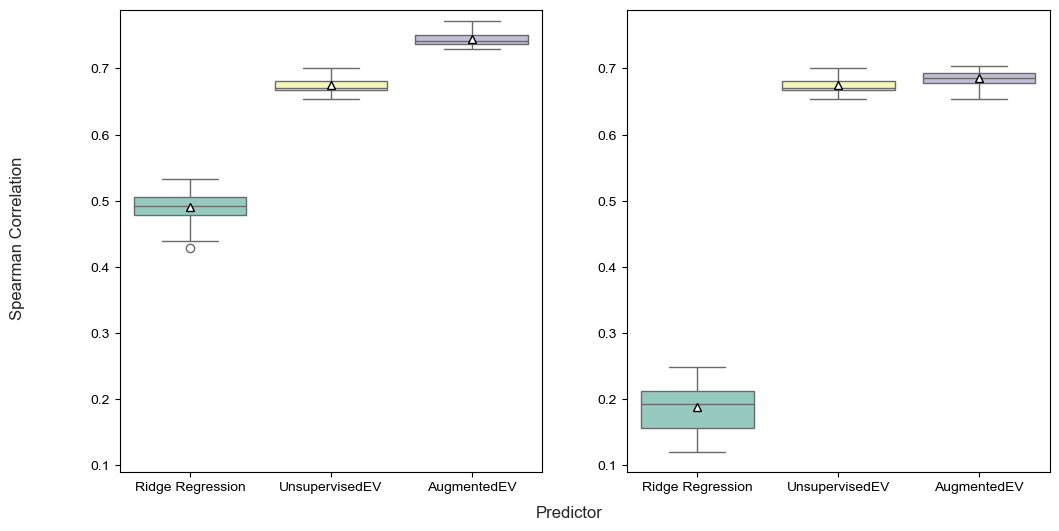

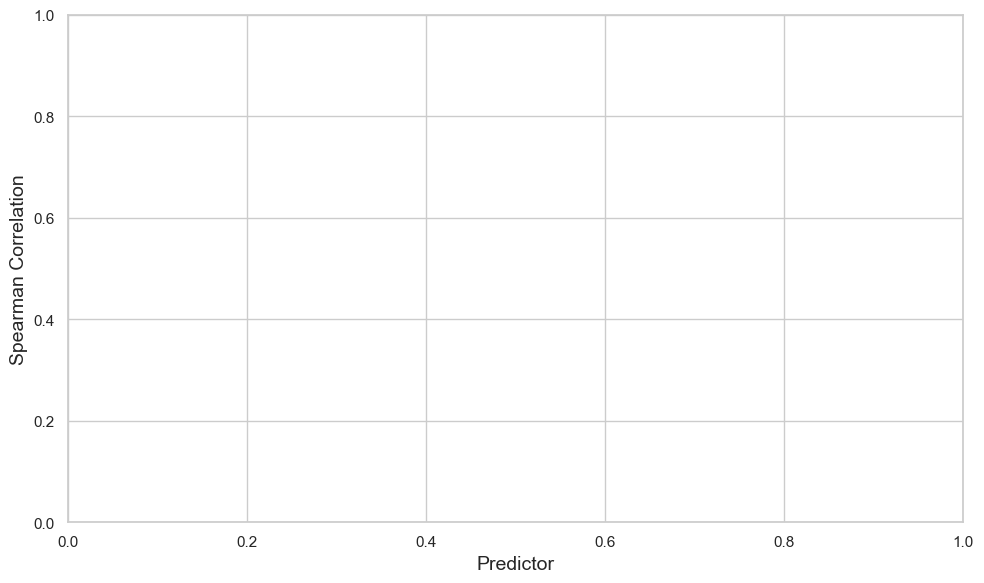

<Figure size 1000x600 with 0 Axes>

In [7]:

concatenated_df = pd.concat([non_augmented_linear, ev_msa_only, ev_augmented])
df_blat_train28 = pd.read_csv('results/BLAT_ECOLX_Ranganathan2015-2500/results.csv')

df_blat_train28['predictor'] = df_blat_train28['predictor'].replace(mapping)

# Define the order
order = ['Ridge Regression', 'UnsupervisedEV', 'AugmentedEV']

# Sort the DataFrame by 'predictors' column using the defined order
df_blat_train28['predictor'] = pd.Categorical(df_blat_train28['predictor'], categories=order, ordered=True)
df_blat_train28 = df_blat_train28.sort_values('predictor')


# Create a PDF file to save the plots
with PdfPages('blat_plots960.pdf') as pdf:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    sns.set(style = "whitegrid")
    custom_palette = sns.color_palette("Set3")

    plt.figure(figsize = (10, 6))
    sns.boxplot(data = concatenated_df, x="predictor", y = "spearman", palette = custom_palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"}, ax=ax1)

    ax1.set_xlabel('')  # Remove x-label
    ax1.set_ylabel('')  # Remove y-label


    plt.xlabel('Predictor', fontsize = 14)
    plt.ylabel('Spearman Correlation', fontsize = 14)

    plt.tight_layout()

    # Beautiful Box Plot

    sns.set(style = "whitegrid")
    custom_palette = sns.color_palette("Set3")


    plt.figure(figsize = (10, 6))
    sns.boxplot(data = df_blat_train28, x = "predictor", y = "spearman", palette = custom_palette, showmeans = True, meanprops = { "markerfacecolor":"white", "markeredgecolor":"black"}, ax=ax2)

    ax2.set_xlabel('')  # Remove x-label
    ax2.set_ylabel('')  # Remove y-label

    # Determine the y-axis limits (you can adjust these limits as per your data)
    y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
    y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])

    # Set the same y-axis limits for both subplots
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

    fig.text(0.5, 0.04, 'Predictor', ha='center', va='center')
    fig.text(0.04, 0.5, 'Spearman Correlation', ha='center', va='center', rotation='vertical')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
    pdf.savefig(fig, dpi=300)

    plt.tight_layout()


C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\435043455.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Light, x="predictor", y="spearman", palette=palette, showmeans=True,
C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\435043455.py:16: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.boxplot(data=df_Light, x="predictor", y="spearman", palette=palette, showmeans=True,


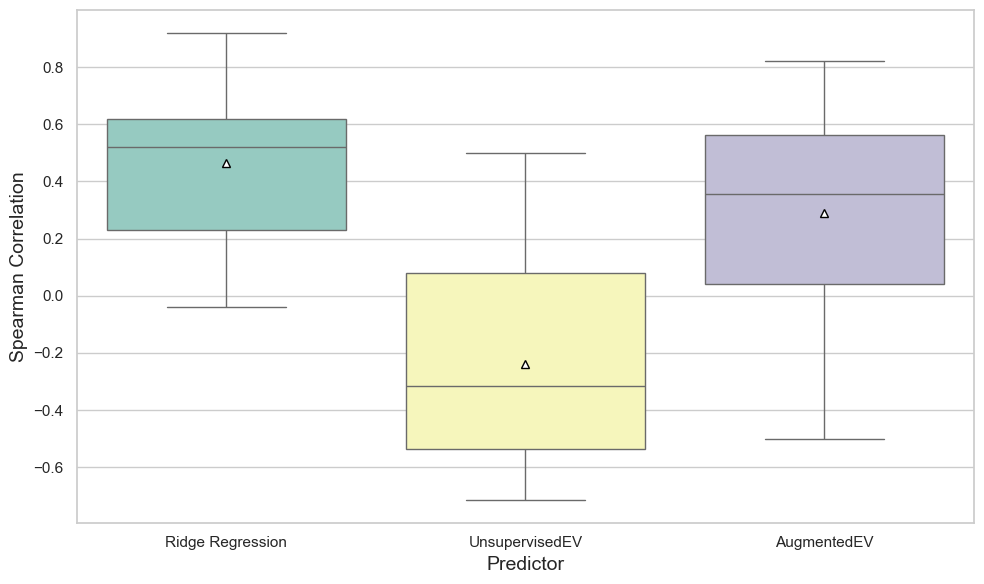

In [8]:
df_Light = pd.read_csv('results/Light/results.csv')

df_Light['predictor'] = df_Light['predictor'].replace(mapping)
# Define a custom order
order = ['Ridge Regression', 'UnsupervisedEV', 'AugmentedEV']

# Sort the DataFrame by 'predictors' column using the defined order
df_Light['predictor'] = pd.Categorical(df_Light['predictor'], categories=order, ordered=True)
df_Light = df_Light.sort_values('predictor')

# Use Seaborn to plot the box plot
sns.set(style="whitegrid")
palette = sns.color_palette("Set3")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_Light, x="predictor", y="spearman", palette=palette, showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})

plt.xlabel('Predictor', fontsize=14)
plt.ylabel('Spearman Correlation', fontsize=14)
plt.tight_layout()
plt.savefig('plots/Light_model_comparison.pdf', dpi = 300)
plt.show()

### 3. Test size comparison

C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1478170663.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='training_size', y='spearman', data=results_df, palette=custom_palette)
C:\Users\kleka\AppData\Local\Temp\ipykernel_17232\1478170663.py:25: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='training_size', y='spearman', data=results_df, palette=custom_palette)


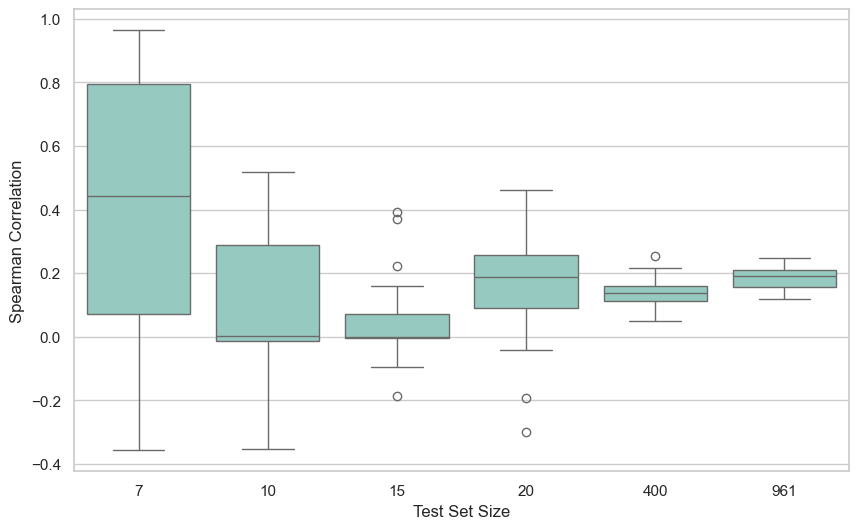

In [11]:
base_path = 'results'
plot_spearman_boxplot(base_path)